In [1]:
# Importing all libraries which we will be using in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

## --> Step 1 - Data Understanding & Cleaning: 

###        View data and checking for Null values or missing values in data

In [2]:
# Import .csv data file using pandas
df = pd.read_csv("C:\\Users\\user\\Desktop\\data analytics soft\\Python_Mini_Project_-_Social_Media_Combat\\Students Social Media Addiction (1).csv")             

In [3]:
# Dataframe count of rows and columns
df.shape

(705, 13)

In [4]:
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [5]:
# To view columns, Data types and null values if any in data
df.info()                                             

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [6]:
#check for null values in data
df.isnull().sum()                                     

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

### Check for Duplicate Values in Data and Removing them

In [7]:
df.duplicated().sum()                                  # TO find duplicate values found in data

0

In [8]:
df = df.drop_duplicates()                              # Deleting the duplicate values in dataframe if any 

In [9]:
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


### Checking Datatypes and changing if needed

In [10]:
# To find any incorrect datatypes in data
df.dtypes                                              

Student_ID                        int64
Age                               int64
Gender                           object
Academic_Level                   object
Country                          object
Avg_Daily_Usage_Hours           float64
Most_Used_Platform               object
Affects_Academic_Performance     object
Sleep_Hours_Per_Night           float64
Mental_Health_Score               int64
Relationship_Status              object
Conflicts_Over_Social_Media       int64
Addicted_Score                    int64
dtype: object

In [11]:
# Copy dataframe to a new Dataframe
newdf = df.copy()
newdf.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [12]:
# defining a function for changing float datatype to hh:mm format in dataframe

def convert_to_Time(data, column_name):
    
    # Convert float hours to timedelta
    temp_timedelta = pd.to_timedelta(data[column_name], unit='h')

    # changing timedelta in datetime format
    date_time = (pd.Timestamp('1970-01-01') + temp_timedelta)
    
    # Convert datetime format to HH:MM
    new_column = f"{column_name}_hhmm"
    data[new_column] = date_time.dt.strftime('%H:%M')

    return data


In [13]:
# applying the above fuction on dataframe columns for changing format 
newdf = convert_to_Time(newdf,'Avg_Daily_Usage_Hours')
newdf = convert_to_Time(newdf,'Sleep_Hours_Per_Night')

In [14]:
# data after cleaning
newdf.head()                                             

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,Avg_Daily_Usage_Hours_hhmm,Sleep_Hours_Per_Night_hhmm
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8,05:12,06:30
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3,02:06,07:30
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9,06:00,05:00
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4,03:00,07:00
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7,04:30,06:00


In [15]:
newdf.dtypes

Student_ID                        int64
Age                               int64
Gender                           object
Academic_Level                   object
Country                          object
Avg_Daily_Usage_Hours           float64
Most_Used_Platform               object
Affects_Academic_Performance     object
Sleep_Hours_Per_Night           float64
Mental_Health_Score               int64
Relationship_Status              object
Conflicts_Over_Social_Media       int64
Addicted_Score                    int64
Avg_Daily_Usage_Hours_hhmm       object
Sleep_Hours_Per_Night_hhmm       object
dtype: object

### ---> Step 2 : Data Analysis 

### Summarize data

In [16]:
# Columns in data
newdf.columns

Index(['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country',
       'Avg_Daily_Usage_Hours', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score',
       'Avg_Daily_Usage_Hours_hhmm', 'Sleep_Hours_Per_Night_hhmm'],
      dtype='object')

In [17]:
# Using describe() for specific columns with values 
newdf[['Avg_Daily_Usage_Hours','Sleep_Hours_Per_Night','Mental_Health_Score',
                            'Conflicts_Over_Social_Media','Addicted_Score']].describe().round(2)

,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.00,705.00,705.00,705.00,705.00
mean,4.92,6.87,6.23,2.85,6.44
std,1.26,1.13,1.11,0.96,1.59
min,1.50,3.80,4.00,0.00,2.00
25%,4.10,6.00,5.00,2.00,5.00
50%,4.80,6.90,6.00,3.00,7.00
75%,5.80,7.70,7.00,4.00,8.00
max,8.50,9.60,9.00,5.00,9.00


### Exploratory Data Analysis (EDA)

In [18]:
# Total students distribution by age

df[['Age']].value_counts().reset_index()

,Age,0
0,20,165
1,19,163
2,21,156
3,22,147
4,23,34
5,24,26
6,18,14


In [19]:
# Students counts by Gender

df[['Gender']].value_counts().reset_index()

,Gender,0
0,Female,353
1,Male,352


In [20]:
# define a function to determine age group based on academic levels
def Age_group(Acad_level):
    
    acad_level = Acad_level.strip()

    if acad_level == 'High School':
        return "Age_group(18 - 20)"
    elif acad_level == 'Undergraduate':
        return "Age_group(19 - 21)"
    else:
        return "Age_group(21 - 24)"


In [21]:
newdf["Age_Group"] = newdf["Academic_Level"].apply(Age_group)
newdf[["Academic_Level", "Age_Group"]].drop_duplicates()

,Academic_Level,Age_Group
0,Undergraduate,Age_group(19 - 21)
1,Graduate,Age_group(21 - 24)
3,High School,Age_group(18 - 20)


In [22]:
# Student in each age group
dfg = newdf.groupby(['Academic_Level',"Age_Group"])['Student_ID'].agg(['count']).reset_index()
dfg.sort_values(by = 'Age_Group')

,Academic_Level,Age_Group,count
1,High School,Age_group(18 - 20),27
2,Undergraduate,Age_group(19 - 21),353
0,Graduate,Age_group(21 - 24),325


### Total Daily usage(hours) vs Age

In [23]:
grouped1 = newdf.groupby(['Age'])['Avg_Daily_Usage_Hours'].agg('sum','count').reset_index()
grouped1.sort_values(by = 'Avg_Daily_Usage_Hours',ascending = False)

,Age,Avg_Daily_Usage_Hours
1,19,834.6
2,20,813.5
3,21,772.3
4,22,687.4
5,23,153.3
6,24,131.2
0,18,75.4


### Avarage daily usage hours vs Gender

In [24]:
grouped2 = newdf.groupby('Gender')['Avg_Daily_Usage_Hours'].agg(['sum','mean']).reset_index().round(2)
grouped2.columns = ['Gender','Total_Avg_Usages','Avg_Usage_Per_Person']
grouped2

,Gender,Total_Avg_Usages,Avg_Usage_Per_Person
0,Female,1768.9,5.01
1,Male,1698.8,4.83


###  Analysis by Age and Gender and daily usage

In [25]:
grouped3 = newdf.groupby(['Age', 'Gender'])['Avg_Daily_Usage_Hours'].agg(['count','sum']).reset_index()
grouped3.columns = ['Age','Gender','Student_Count','Total_Avg_Usages']

# Sorting Data and finding top 5 students based on total daily usage
grouped3.sort_values(by = 'Total_Avg_Usages',ascending = False).head()

,Age,Gender,Student_Count,Total_Avg_Usages
4,20,Female,146,716.0
2,19,Female,135,692.4
9,22,Male,134,621.5
7,21,Male,125,616.2
6,21,Female,31,156.1


In [26]:
# Total daily usage for female students with age group (19yr to 21 yr)
df[(df['Age'] >= 19) & (df['Age'] <= 21) & (df['Gender'] == 'Female')]['Avg_Daily_Usage_Hours'].sum()

1564.5

In [27]:
# Total daily usage for Male students with age group (19yr to 21 yr)
df[(df['Age'] >= 19) & (df['Age'] <= 21) & (df['Gender'] == 'Male')]['Avg_Daily_Usage_Hours'].sum().round(1)

855.9

From above data we can conclude that students with most average daily usage are within age group(19yr to 21 yr) with female students has majority in daily data usage, for average usage per person females have more social media usages compare to males.

### Analysis by sleep pattern, Acadmic performance and Social Interactions

In [28]:
newdf.columns

Index(['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country',
       'Avg_Daily_Usage_Hours', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score',
       'Avg_Daily_Usage_Hours_hhmm', 'Sleep_Hours_Per_Night_hhmm',
       'Age_Group'],
      dtype='object')

In [29]:
# Gender vs average sleep per night vs social media conflict
grouped4 = newdf.groupby(['Gender'])['Sleep_Hours_Per_Night','Addicted_Score',
                                     'Conflicts_Over_Social_Media'].mean().reset_index().round(2)
grouped4

,Gender,Sleep_Hours_Per_Night,Addicted_Score,Conflicts_Over_Social_Media
0,Female,6.82,6.52,2.93
1,Male,6.92,6.36,2.76


In [30]:
# Relation between Acadmic level vs (avg. sleep, addicted score , mental health)
grouped5 = newdf.groupby(['Academic_Level'])['Sleep_Hours_Per_Night','Addicted_Score',
                                             'Conflicts_Over_Social_Media','Mental_Health_Score'
                                            ].mean().reset_index().round(2)
grouped5

,Academic_Level,Sleep_Hours_Per_Night,Addicted_Score,Conflicts_Over_Social_Media,Mental_Health_Score
0,Graduate,7.03,6.24,2.70,6.37
1,High School,5.46,8.04,3.74,5.11
2,Undergraduate,6.83,6.49,2.92,6.18


In [31]:
# Calculate counts per Gender and Relationship Status
relationship_counts = newdf.groupby('Gender')['Relationship_Status'].value_counts(normalize=True)

# Convert to percentage
relationship_percentages = (relationship_counts * 100).unstack()
relationship_percentages.round()

Relationship_Status,Complicated,In Relationship,Single
Gender,,,
Female,5.0,39.0,56.0
Male,4.0,43.0,53.0


In [32]:
# finding how is the behaviour pattern of students with different relationship status 
relationship_data = df.groupby(['Gender','Relationship_Status'])['Addicted_Score','Sleep_Hours_Per_Night',
                                                                 'Mental_Health_Score','Conflicts_Over_Social_Media'
                                                                ].mean()
relationship_data.round(2)

Addicted_Score  Sleep_Hours_Per_Night  \
Gender Relationship_Status                                          
Female Complicated                    7.47                   5.65   
       In Relationship                6.67                   6.56   
       Single                         6.32                   7.10   
Male   Complicated                    6.53                   6.19   
       In Relationship                6.04                   7.08   
       Single                         6.60                   6.85   

                            Mental_Health_Score  Conflicts_Over_Social_Media  
Gender Relationship_Status                                                    
Female Complicated                         5.65                         3.35  
       In Relationship                     6.07                         2.90  
       Single                              6.29                         2.92  
Male   Complicated                         6.27                         2.67  
       In Relationship                     6.50                         2.64  
       Single                              6.10                         2.88

In [33]:
#total students in each academic level
students = newdf.groupby("Academic_Level")['Student_ID'].count().reset_index()
students

,Academic_Level,Student_ID
0,Graduate,325
1,High School,27
2,Undergraduate,353


In [59]:
# Creating boolean column for performance affected for further calculations
newdf['Performance_Affected'] = newdf['Affects_Academic_Performance'].str.strip().str.lower() == 'yes'

# Total students per Academic_Level and Gender
total_students = newdf.groupby(['Academic_Level', 'Gender'])['Student_ID'].count().reset_index(name='Total_Students')

# Affected students (Performance_Affected == True)
affected_students = newdf[newdf['Performance_Affected'] == True] \
    .groupby(['Academic_Level', 'Gender'])['Student_ID'].count().reset_index(name='Affected_Students')

merged = pd.merge(total_students, affected_students, on=['Academic_Level', 'Gender'], how='left')

# Calculate percentage
merged['Percentage_Performance_Affected'] = (merged['Affected_Students'] / merged['Total_Students']) * 100
merged.round(2)

,Academic_Level,Gender,Total_Students,Affected_Students,Percentage_Performance_Affected
0,Graduate,Female,48,24,50.00
1,Graduate,Male,277,175,63.18
2,High School,Female,15,15,100.00
3,High School,Male,12,10,83.33
4,Undergraduate,Female,290,192,66.21
5,Undergraduate,Male,63,37,58.73


### Classify the Risk Level:

In [41]:
# finding max for average daily usage
newdf['Avg_Daily_Usage_Hours'].max()

8.5

In [42]:
# finding minimum daily usage
newdf['Avg_Daily_Usage_Hours'].min()

1.5

In [43]:
# Average Daily Usage in hours for all students 
round(newdf['Avg_Daily_Usage_Hours'].mean(),2)             

4.92

In [35]:
# defining a function for risk levels
def risk_level(hours):
    if hours < 2:
        return 'Low'
    elif hours < 5:
        return 'Medium'
    else:
        return 'High'

In [36]:
newdf['Risk_Level'] = df['Avg_Daily_Usage_Hours'].apply(risk_level)
newdf.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,Avg_Daily_Usage_Hours_hhmm,Sleep_Hours_Per_Night_hhmm,Age_Group,Performance_Affected,Risk_Level
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8,05:12,06:30,Age_group(19 - 21),True,High
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3,02:06,07:30,Age_group(21 - 24),False,Medium
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9,06:00,05:00,Age_group(19 - 21),True,High
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4,03:00,07:00,Age_group(18 - 20),False,Medium
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7,04:30,06:00,Age_group(21 - 24),True,Medium


In [37]:
# top 5 countries with highest addiction score
country_data = newdf.groupby(["Country","Risk_Level"])['Mental_Health_Score','Addicted_Score','Avg_Daily_Usage_Hours',].mean()
country_data.sort_values(by = 'Addicted_Score',ascending = False).reset_index().head()

,Country,Risk_Level,Mental_Health_Score,Addicted_Score,Avg_Daily_Usage_Hours
0,Czech Republic,High,4.0,9.0,6.1
1,Ecuador,High,5.0,9.0,6.3
2,Lebanon,High,5.0,9.0,5.8
3,Liechtenstein,High,5.0,9.0,5.8
4,Armenia,High,5.0,9.0,5.9


In [38]:
#top 5 countries with highest average daily usage
country_data.sort_values(by = 'Avg_Daily_Usage_Hours',ascending = False).reset_index().head().round(2)

,Country,Risk_Level,Mental_Health_Score,Addicted_Score,Avg_Daily_Usage_Hours
0,Australia,High,4.00,9.00,7.20
1,USA,High,4.90,8.60,6.89
2,Russia,High,4.12,8.75,6.79
3,UAE,High,5.00,8.12,6.72
4,India,High,5.12,7.88,6.51


In [39]:
# filtering data based on more than 3 conflicts over social media 
newdf[newdf['Conflicts_Over_Social_Media']> 3].mean().reset_index().round()

,index,0
0,Student_ID,371.0
1,Age,20.0
2,Avg_Daily_Usage_Hours,6.0
3,Sleep_Hours_Per_Night,6.0
4,Mental_Health_Score,5.0
5,Conflicts_Over_Social_Media,4.0
6,Addicted_Score,8.0
7,Performance_Affected,1.0


In [40]:
age_mental= newdf.groupby(["Age_Group","Academic_Level"])['Mental_Health_Score'].mean().reset_index()
age_mental.round(2)

,Age_Group,Academic_Level,Mental_Health_Score
0,Age_group(18 - 20),High School,5.11
1,Age_group(19 - 21),Undergraduate,6.18
2,Age_group(21 - 24),Graduate,6.37


From above data we can conclude that the lesser the metal health score, the greater the increase in conflicts over social media, higher risk level and  Addicted Score. and students with lower age tends to have lower mental health score.

### Aggregation based on risk level

In [44]:
# Gender vs risk level vs average addicted score
agg = newdf.groupby(['Gender','Risk_Level'])['Addicted_Score'].mean().reset_index()
agg

,Gender,Risk_Level,Addicted_Score
0,Female,High,7.925926
1,Female,Medium,5.319372
2,Male,High,7.506849
3,Male,Low,2.000000
4,Male,Medium,5.560976


In [45]:
agg1 = newdf.groupby(['Academic_Level', 'Risk_Level']).agg(Student_Count=('Student_ID', 'count'),
                                                           Avg_Daily_Usage_Hours=('Avg_Daily_Usage_Hours', 'mean'),
                                                           Sleep_Hours_Per_Night=('Sleep_Hours_Per_Night', 'mean'),
                                                           Addicted_Score=('Addicted_Score', 'mean')
                                                           ).reset_index()
agg1.round(2)

,Academic_Level,Risk_Level,Student_Count,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Addicted_Score
0,Graduate,High,136,5.94,6.25,7.43
1,Graduate,Low,1,1.50,8.00,2.00
2,Graduate,Medium,188,3.95,7.59,5.41
3,High School,High,25,5.71,5.35,8.32
4,High School,Medium,2,3.50,6.75,4.50
5,Undergraduate,High,147,6.28,5.89,7.90
6,Undergraduate,Medium,206,4.09,7.50,5.49


Students with high risk level are having less sleep hours per night,increase in average daily usage and higher addiction score compare to medium and low risk level students. 

### Detox Strategy For Students Based on Risk Level

In [46]:
# Defining a function for detox Strategy 
def suggest_detox_strategy(df):
    # High Risk Level
    if df['Risk_Level'] == 'High':
        if df['Avg_Daily_Usage_Hours'] >= 7:
            return 'Two weeks social media break and more sleep hours'
        elif df['Sleep_Hours_Per_Night'] < 7 and df['Sleep_Hours_Per_Night'] > 6:
            return 'More sleeping hours and daily screen time limit'
        else:
            return 'Reduce usage gradually and weekly check-ins'
        
    # Medium Risk level
    elif df['Risk_Level'] == 'Medium':
        if df['Avg_Daily_Usage_Hours'] > 4:
            return 'Encourage offline activities and reduce screen time'
        else:
            return 'Awareness training and Guidance from parents'
        
    # Low Risk Level
    elif df['Risk_Level'] == 'Low':
        return 'Maintain Good Habits – No Detox Required'

    else:
        return 'No Data'


In [47]:
# Applying fuction to dataframe
newdf['Detox_Strategy'] = newdf.apply(suggest_detox_strategy, axis=1)

# filtering data to view Risk level and Detox Strategy 
newdf[['Student_ID','Risk_Level','Detox_Strategy']].head(10)

,Student_ID,Risk_Level,Detox_Strategy
0,1,High,More sleeping hours and daily screen time limit
1,2,Medium,Awareness training and Guidance from parents
2,3,High,Reduce usage gradually and weekly check-ins
3,4,Medium,Awareness training and Guidance from parents
4,5,Medium,Encourage offline activities and reduce screen...
5,6,High,Two weeks social media break and more sleep hours
6,7,Low,Maintain Good Habits – No Detox Required
7,8,High,Reduce usage gradually and weekly check-ins
8,9,Medium,Awareness training and Guidance from parents
9,10,Medium,Awareness training and Guidance from parents


## Data Visualization using matplotlib and seaborn

### Line Chart Visualization for Social Plateform vs Avg daily Usage 

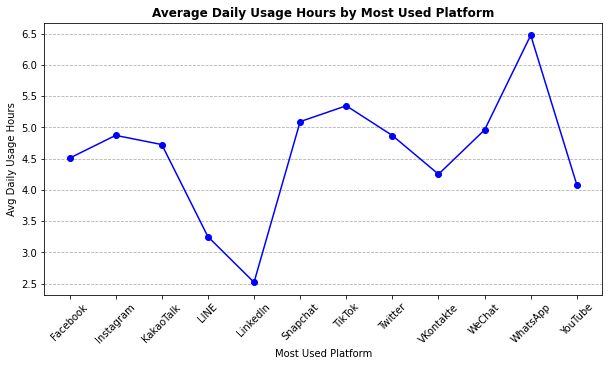

In [48]:
grouped = newdf.groupby('Most_Used_Platform')['Avg_Daily_Usage_Hours'].mean().reset_index()

x = grouped['Most_Used_Platform']
y = grouped['Avg_Daily_Usage_Hours']

plt.figure(figsize=(10, 5))
plt.plot(x, y, marker='o', linestyle='-', color='b')
plt.title('Average Daily Usage Hours by Most Used Platform', fontweight='bold')
plt.xlabel('Most Used Platform')
plt.ylabel('Avg Daily Usage Hours')
plt.xticks(rotation =45)
plt.grid(axis = 'y',linestyle='--')
plt.show()


From above we get that on average students spend more time on whatsapp compare to other social media plateforms.

### Student Distribution by Age

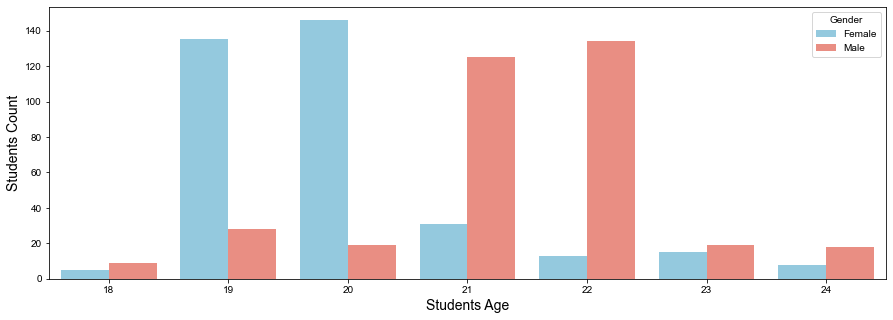

In [49]:
# Age Distribution by Gender in Dataframe
fig = plt.figure(figsize = (15,5))
ax = sns.countplot(x='Age', data = newdf,hue = 'Gender',palette = ['skyblue','salmon'])
sns.set(style = "whitegrid")
ax.set_xlabel('Students Age', fontsize = 14)
ax.set_ylabel('Students Count', fontsize = 14)
plt.show()

We have female students in majority for age 19 yr & 20 yr and male students in majority for age 21 yr & 22 yr.

### Academic level data visualization using Box Plot

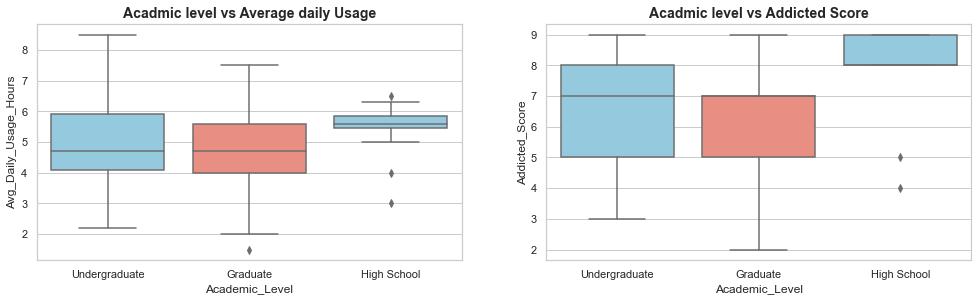

In [50]:
plt.figure(figsize = (35,20))
sns.set(style = "whitegrid")
plt.subplot(4,4,1)
sns.boxplot(data = newdf, x = 'Academic_Level', y ='Avg_Daily_Usage_Hours', palette = ['skyblue','salmon'])
plt.title('Acadmic level vs Average daily Usage',fontsize =14,fontweight = 'bold')

plt.subplot(4,4,2)
sns.boxplot(data = newdf, x = 'Academic_Level', y ='Addicted_Score', palette= ['skyblue','salmon'])
plt.title('Acadmic level vs Addicted Score',fontsize =14,fontweight = 'bold')

plt.show()

From above box plots we can conclude that high school students have the highest addicted score and as the academic level increases, the average daily usage and addiction score decrease.

### Gender based data visualization for daily usages and sleep hours

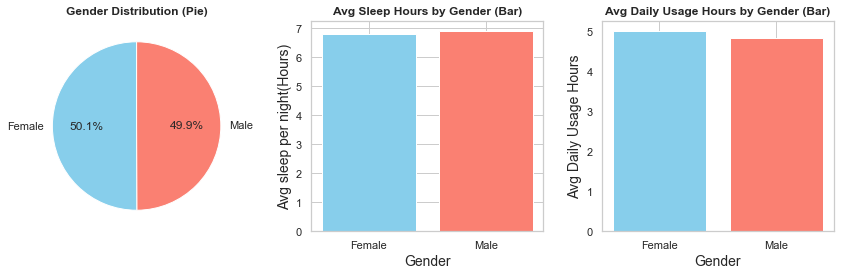

In [51]:
data = newdf.groupby(['Gender'])[['Avg_Daily_Usage_Hours','Student_ID','Sleep_Hours_Per_Night']].agg({'Student_ID':'count',
                                                                                                'Avg_Daily_Usage_Hours':'mean',
                                                                                              'Sleep_Hours_Per_Night':'mean'})
data = data.reset_index().round(2)

# Creating subplots 
fig, axes = plt.subplots(1,3, figsize=(12,4))

# Gender Distribution
axes[0].pie(data['Student_ID'], labels=data['Gender'], autopct='%1.1f%%', startangle=90, colors = ['skyblue','salmon'])
axes[0].set_title("Gender Distribution (Pie)",fontweight = 'bold')

# gender vs sleep hours per night
axes[1].bar(data['Gender'], data['Sleep_Hours_Per_Night'], color=['skyblue','salmon'])
axes[1].set_title("Avg Sleep Hours by Gender (Bar)",fontweight = 'bold')
axes[1].set_xlabel("Gender",fontsize = 14)
axes[1].set_ylabel("Avg sleep per night(Hours)",fontsize = 14)

# gender vs average daily hour usage
axes[2].bar(data['Gender'], data['Avg_Daily_Usage_Hours'], color=['skyblue','salmon'])
axes[2].set_title("Avg Daily Usage Hours by Gender (Bar)",fontweight = 'bold')
axes[2].set_xlabel("Gender",fontsize = 14)
axes[2].set_ylabel("Avg Daily Usage Hours",fontsize = 14)
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


From above we can see that on average girls usually spend more time on social media and have less sleeping hours than boys.

### Acadmic Level Vs  Social Media Addiction Score

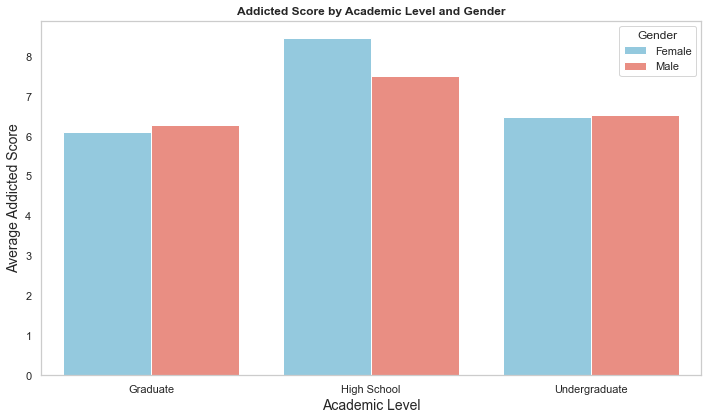

In [52]:
# using groupby based on gender and acadmic level
data1 = newdf.groupby(['Gender','Academic_Level'])['Addicted_Score'].mean().reset_index().round(2)

plt.figure(figsize=(10,6))
sns.barplot(data=data1, x ='Academic_Level',y ='Addicted_Score',hue='Gender',palette= ['skyblue','salmon'])
plt.title("Addicted Score by Academic Level and Gender", fontweight='bold')
plt.xlabel("Academic Level",fontsize = 14)
plt.ylabel("Average Addicted Score",fontsize = 14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


From above we can find that for high school students, females are more addictive to social media and male studends spend more time on social media at undergraduate and graduate levels.

### Scatter plot visulization for Average Daily Usage, Mental Health vs Addicted Score 

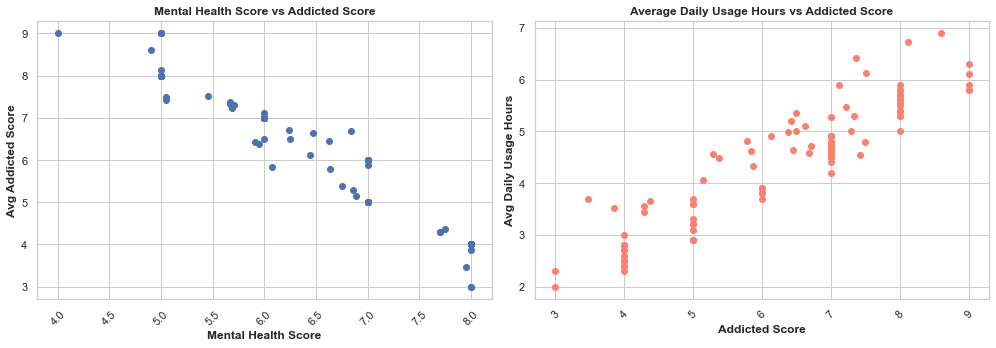

In [53]:
data3 = newdf.groupby(["Country"])['Mental_Health_Score','Addicted_Score','Avg_Daily_Usage_Hours',].mean()

# scatter plot

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(data3['Mental_Health_Score'], data3['Addicted_Score'])
axes[0].set_title("Mental Health Score vs Addicted Score", fontweight='bold')
axes[0].set_xlabel("Mental Health Score", fontweight='bold')
axes[0].set_ylabel("Avg Addicted Score", fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

axes[1].scatter(data3['Addicted_Score'], data3['Avg_Daily_Usage_Hours'], color='salmon')
axes[1].set_title("Average Daily Usage Hours vs Addicted Score", fontweight='bold')
axes[1].set_xlabel("Addicted Score", fontweight='bold')
axes[1].set_ylabel("Avg Daily Usage Hours", fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


From above chart on average we can find that the more time students are spending on social media the more addicted they are getting and mental health degrades when addicted score increases.   

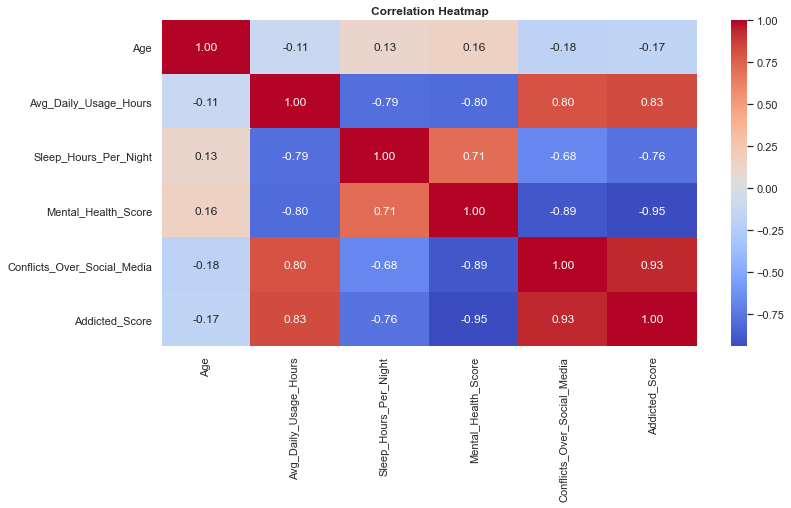

In [54]:
# Selected numeric columns
numeric_cols = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night',
                'Mental_Health_Score', 'Conflicts_Over_Social_Media', 
                'Addicted_Score']

# correlation matrix
corr = newdf[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap', fontweight='bold')
plt.show()

From above heatmap we can conclude these points:

-->  The more daily hours spent on social media, we have more conflicts, higher addiction score and lower mental health.

-->  Age has minimal effects on other parameters i.e. consistant data pattern across all age group.

-->  Less sleep hours per night is associated with higher usage and addiction to social media.

### Risk level visualization


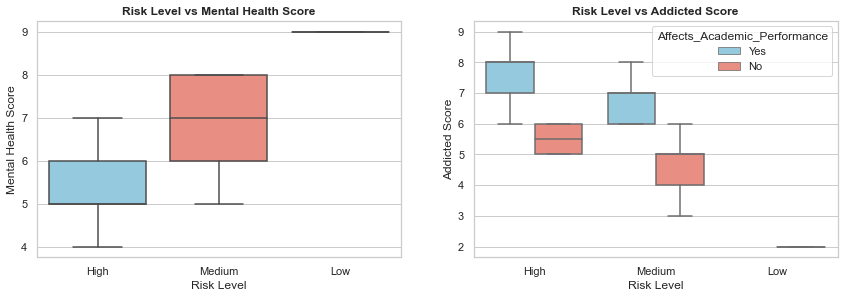

In [55]:
fig = plt.figure(figsize=(30,20))
plt.subplot(4,4,1)
sns.boxplot(data=newdf, x='Risk_Level', y='Mental_Health_Score', palette=['skyblue','salmon','orange'])
plt.title('Risk Level vs Mental Health Score', fontweight='bold')
plt.xlabel('Risk Level')
plt.ylabel('Mental Health Score')

plt.subplot(4,4,2)
sns.boxplot(data=newdf, x='Risk_Level', y='Addicted_Score',hue = "Affects_Academic_Performance", palette=['skyblue','salmon','orange'])
plt.title('Risk Level vs Addicted Score', fontweight='bold')
plt.xlabel('Risk Level')
plt.ylabel('Addicted Score')

plt.show()

The students with lower mental score have higher risk level and higher probability to affect thieir academic performance.

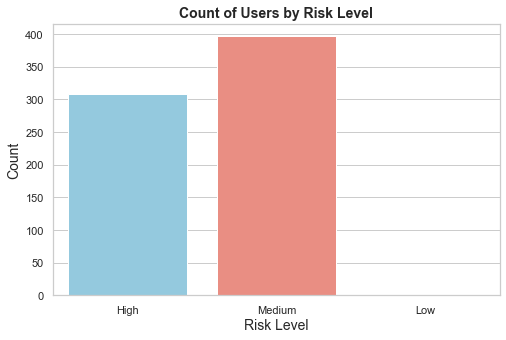

In [56]:
plt.figure(figsize=(8,5))
sns.countplot(data=newdf, x='Risk_Level', palette=['skyblue','salmon','orange'])
plt.title("Count of Users by Risk Level", fontsize=14, fontweight='bold')
plt.xlabel("Risk Level",fontsize = 14)
plt.ylabel("Count",fontsize = 14)
plt.show()


From above we get that most numbers of students belong to medium Risk and then high risk students.

### Top 10 Countries based on total High Risk Students

In [57]:
# finding contries vs number of high risk students
high_risk_Students_counts = newdf[newdf['Risk_Level'] == 'High'].groupby('Country').agg(Total_Students = ('Student_ID', 'count'))

# Finding top 10 countries
Top_Countries = high_risk_Students_counts.sort_values(by = 'Total_Students',ascending = False).reset_index().head(10)

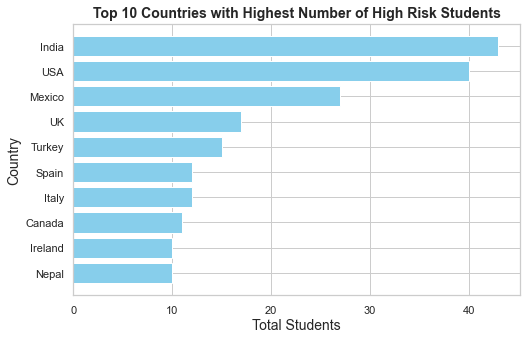

In [58]:
plt.figure(figsize=(8,5))

plt.barh(Top_Countries['Country'], Top_Countries['Total_Students'], color='skyblue')
plt.title("Top 10 Countries with Highest Number of High Risk Students",fontsize=14,fontweight='bold')
plt.xlabel("Total Students",fontsize=14)
plt.ylabel("Country",fontsize=14)
plt.gca().invert_yaxis()  
plt.show()


From above we can conclude that India , USA and Mexico has the highest numbers of High risk Students.

### Conclusion:

###  Key Patterns:

** Students with high usage hours display significantly lower sleep and mental health scores.

** Males show a marginally higher addiction score on average.

** Risk levels increase with younger ages for high school and Undergraduates.

** Most students fall in the medium risk category and then secondly in high-risk category.

** Students with higher addiction score are having low mental health and more numbers of conflicts on social media.

** From boxplot analysis we can find that students with addiction score > 6, are generally having their academic performance      affected.

###  Root Cause:

** The data suggests that higher daily usage of social media negatively affects both academic performance and mental health. Additionally, students who spend more hours online tend to exhibit higher levels of social media addiction.

### Recommeded Actions:

** Use of Detox Strategy is most recommended for high-risk and medium risk students.

** To fight addiction in students will also require proactive involvement from educators and parents.

** Institutions can also provide guidance for awareness about social media addiction.

** Students should be encouraged to participate in more offline activities with each others like games,dabates etc.